This is the dataset containing tweets from parody and real accounts.

- `person`: Name of politician (eg. Boris Johnson)
- `account`: Twitter account name (eg. @BorisJohnson)
- `tweet_id`: The id of the given tweet
- `tweet_pp`: The tweet text, pre-processed
- `tweet_raw`: The tweet text, in its original form
- `label`: Whether the tweet is parody (0) or real (1)

# 3) Location Split Experiment

## 3.1) US-UK training data and ROW testing data

## Data Exploration

In [30]:
#!pip install emoji

  Created wheel for emoji: filename=emoji-0.6.0-py3-none-any.whl size=49714 sha256=74575cbccfa0a70566ed85ccf07333fa8cae7514f7fb3ea45d7d6a86c6ae566f
  Stored in directory: c:\users\talha\appdata\local\pip\cache\wheels\43\3d\82\e7baffa5e86346c6178d7750dba6e8ef063282a37fc563f8f8
Successfully built emoji


In [1]:
#Importing the required libraries to read,visualize and model the givn dataset files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as pyo
# Set notebook mode to work in offline
pyo.init_notebook_mode()
import missingno as msno 
import warnings
warnings.filterwarnings("ignore")
import re
import re
import string
import nltk
import itertools
import emoji
from nltk.corpus import stopwords
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
import nltk
from nltk.tokenize import word_tokenize,RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from platform import python_version
print (python_version())

3.8.5


In [2]:
from textacy.preprocessing.replace import replace_urls

In [3]:
# Read the dataset csv files and create pandas datframes
USUKtrain_df=pd.read_csv("./location/test_on_intl/usuktrain.csv")
ROWtest_df=pd.read_csv("./location/test_on_intl/intltest.csv") 
print("Train and Test data sets are imported successfully")

Train and Test data sets are imported successfully


In [4]:
# Define a function to explore the train and test dataframes
def explore_data(df):
    
    '''Input- df= pandas dataframes to be explored
       Output- print shape, info and first 5 records of the dataframe 
    '''
    
    print("-"*50)
    print('Shape of the dataframe:',df.shape)
    print("Number of records in train data set:",df.shape[0])
    print("Information of the dataset:")
    df.info()
    print("-"*50)
    print("First 5 records of the dataset:")
    return df.head()
    print("-"*50)

In [5]:
# Lets use explore_data() function to explore train data
explore_data(USUKtrain_df)

--------------------------------------------------
Shape of the dataframe: (85800, 6)
Number of records in train data set: 85800
Information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85800 entries, 0 to 85799
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   85800 non-null  int64 
 1   person     85800 non-null  object
 2   account    85800 non-null  object
 3   tweet_pp   85800 non-null  object
 4   tweet_raw  85800 non-null  object
 5   label      85800 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 3.9+ MB
--------------------------------------------------
First 5 records of the dataset:


tweet_id        person        account  \
0  1190190221813571584  Damon Thayer  @damon_thayer   
1  1189898588534575105  Damon Thayer  @damon_thayer   
2  1189895059665309696  Damon Thayer  @damon_thayer   
3  1189737246473277440  Damon Thayer  @damon_thayer   
4  1189731087028826113  Damon Thayer  @damon_thayer   

                                            tweet_pp  \
0  . <mention> has done a terrific job as state t...   
1  on tuesday , join me in voting <mention> he th...   
2  good story by <mention> in <mention> on some o...   
3  i guess if you count steve beshear going to ro...   
4     i here to make people dreams come true . <url>   

                                           tweet_raw  label  
0  b'.@AllisonJoyBall has done a terrific job as ...      1  
1  b'On Tuesday, join me in voting @Adams4SecStat...      1  
2  b'Good story by @flysofree in @paulickreport o...      1  
3  b'I guess if you count Steve Beshear going to ...      1  
4  b'I’m here to make people’s dreams come true. ...      1

In [6]:
# Lets use explore_data() function to explore test data
explore_data(ROWtest_df)

--------------------------------------------------
Shape of the dataframe: (34892, 6)
Number of records in train data set: 34892
Information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34892 entries, 0 to 34891
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   34892 non-null  int64 
 1   person     34892 non-null  object
 2   account    34892 non-null  object
 3   tweet_pp   34892 non-null  object
 4   tweet_raw  34892 non-null  object
 5   label      34892 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.6+ MB
--------------------------------------------------
First 5 records of the dataset:


tweet_id            person          account  \
0   324763873125224448      Rahul Gandhi    @hydyouthcong   
1   778357567336681472  Muhammadu Buhari         @MBuhari   
2  1129104679126937600   Guy Verhofstadt  @guyverhofstadt   
3  1159417901067018241   Lee Hsien Loong   @leehsienloong   
4   905098366597697536  Muhammadu Buhari         @MBuhari   

                                            tweet_pp  \
0  <mention> why do you want <mention> to throw r...   
1  we had a good meeting with <mention> . i thank...   
2  elke dag presenteren wij een kandidaat voor de...   
3  tomorrow we celebrate our 54th national day in...   
4  the real change for nigerians is an impact tha...   

                                           tweet_raw  label  
0  b'@shagilg Why do you want @SirRahulGandhi to ...      0  
1  b'We had a good meeting with @POTUS. I thanked...      1  
2  b'✅ Elke dag presenteren wij een kandidaat voo...      1  
3  b'Tomorrow we celebrate our 54th National Day ...      1  
4  b'The real change for Nigerians is an impact t...      1

In [7]:
#Lets visulaize dataframe features using charts
def feature_viz(df,feature):
    
    '''Input- df=pandas dataframe
              feature= column to be charted
       Output- bar and scatter chart using plotly       
    
    '''
    #Visualize the feature
    if feature=='label':
        sns.countplot(feature, data=df)
        print('Label of 0 is {} % of total'.format(round(df[feature].value_counts()[0]/len(df[feature])*100)))
        print('Label of 1 is {} % of total'.format(round(df[feature].value_counts()[1]/len(df[feature])*100)))
    else:
        #Distinct keywords in train dataset
        feat=df[feature].value_counts()
        print(feat.head())
        fig = px.scatter(feat, x=feat.values, y=feat.index,size=feat.values)
        fig.show()

Label of 0 is 50 % of total
Label of 1 is 50 % of total


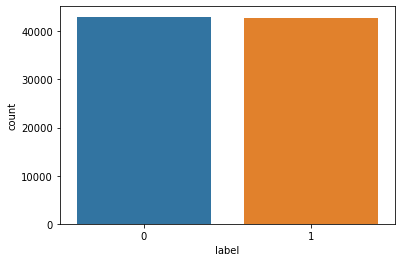

In [8]:
#Lets use feature_viz function to create charts for 'target' column
feature_viz(USUKtrain_df,'label')

Hillary Clinton    5171
Barack Obama       4490
Steve Barclay      4392
Nick Boles         4093
Ivanka Trump       3906
Name: person, dtype: int64


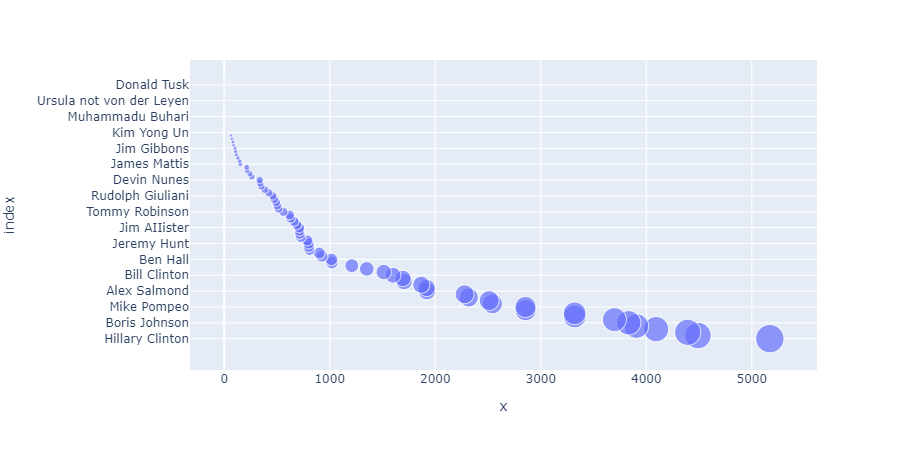

In [10]:
feature_viz(USUKtrain_df,'person')

Let's check how often the word 'parody' come in the 'tweet' feature in the dataset and whether this help us in determining whether a tweet belongs to a parody' category or not.

In [11]:
USUKtrain_df.loc[USUKtrain_df['tweet_raw'].str.contains('parody', na=False, case=False)].label.value_counts()

0    171
1      2
Name: label, dtype: int64

Lets further analyize the `tweet_raw` feature and if there is any correlation between `tweet_raw` and length of the tweets itself.

In [12]:
# Lets find the length of the 'tweet_raw' for each row and add a new cloumn to persontrain dataframe 
USUKtrain_df['tweet_raw_length'] = USUKtrain_df['tweet_raw'].apply(lambda x : len(x))
USUKtrain_df.head(4)

tweet_id        person        account  \
0  1190190221813571584  Damon Thayer  @damon_thayer   
1  1189898588534575105  Damon Thayer  @damon_thayer   
2  1189895059665309696  Damon Thayer  @damon_thayer   
3  1189737246473277440  Damon Thayer  @damon_thayer   

                                            tweet_pp  \
0  . <mention> has done a terrific job as state t...   
1  on tuesday , join me in voting <mention> he th...   
2  good story by <mention> in <mention> on some o...   
3  i guess if you count steve beshear going to ro...   

                                           tweet_raw  label  tweet_raw_length  
0  b'.@AllisonJoyBall has done a terrific job as ...      1               193  
1  b'On Tuesday, join me in voting @Adams4SecStat...      1               264  
2  b'Good story by @flysofree in @paulickreport o...      1               275  
3  b'I guess if you count Steve Beshear going to ...      1               298

In [13]:
USUKtrain_df.tweet_raw_length.describe()

count    85800.000000
mean       141.045455
std         77.472050
min          4.000000
25%         82.000000
50%        131.000000
75%        187.000000
max        801.000000
Name: tweet_raw_length, dtype: float64

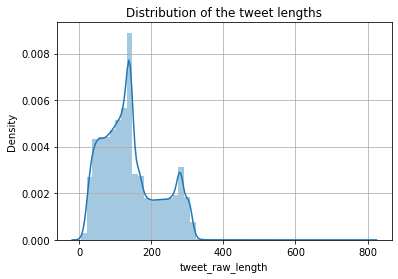

In [14]:
#Create distribution chart to visualize text length distribution
ax=sns.distplot(USUKtrain_df['tweet_raw_length']).set_title('Distribution of the tweet lengths');
plt.grid(True)

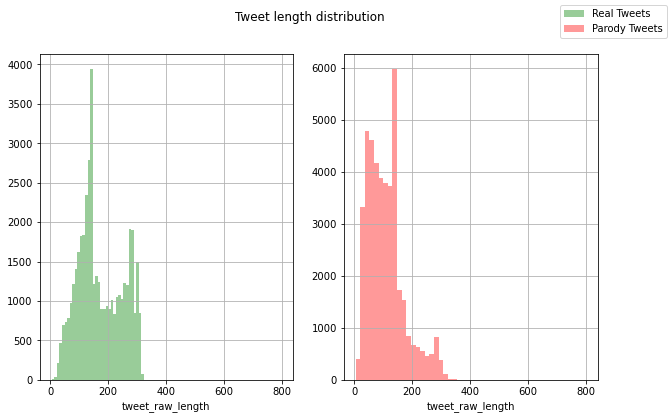

In [15]:
#Create visualization of the distribution of tweet length in comparision to label feature
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True,figsize=(10,6))
sns.distplot(USUKtrain_df[(USUKtrain_df['label'] == 1)]['tweet_raw_length'], ax=ax1, kde=False, color='green',label='Real Tweets')
sns.distplot(USUKtrain_df[(USUKtrain_df['label'] == 0)]['tweet_raw_length'],ax=ax2, kde=False, color='red',label='Parody Tweets');
f.suptitle('Tweet length distribution')
f.legend(loc='upper right')
ax1.grid()
ax2.grid()
plt.show()

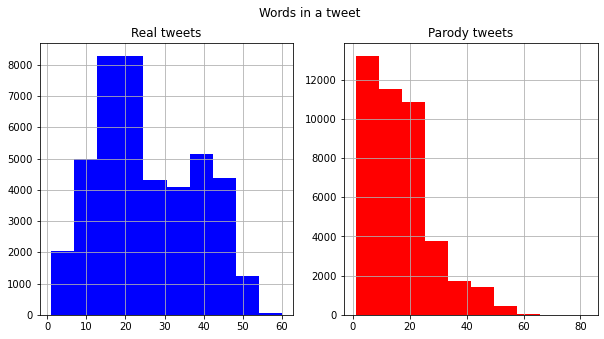

In [16]:
#Create visualization of the distribution of the word counts in comparision to label feature
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
real_tweet=USUKtrain_df[USUKtrain_df['label']==1]['tweet_raw'].str.split().map(lambda x: len(x))
ax1.hist(real_tweet,color='blue')
ax1.set_title('Real tweets')
ax1.grid()
parody_tweet=USUKtrain_df[USUKtrain_df['label']==0]['tweet_raw'].str.split().map(lambda x: len(x))
ax2.hist(parody_tweet,color='red')
ax2.set_title('Parody tweets')
ax2.grid()
fig.suptitle('Words in a tweet')
plt.show()

### Exploring the Label Column

- Distribution of the Label Column-
   - We have to predict whether a given tweet is about a real or parody.
   - If real, predict a `1`. If not, predict a `0`.
- Exploring the Label Column- Let's look at what the real and the parody tweets look like.

In [17]:
# A real tweet exmaple
real_tweets=USUKtrain_df[USUKtrain_df['label']==1]['tweet_raw'][10:20]
real_tweets

10    b'What this obviously smart guy says⤵️ https:/...
11              b'I voted YES. https://t.co/YWSwVLNSjl'
12              b'I voted YES. https://t.co/YWSwVLNSjl'
13              b'I voted YES. https://t.co/YWSwVLNSjl'
14              b'I voted YES. https://t.co/YWSwVLNSjl'
15                 b'Accurate. https://t.co/gBzimzlzDt'
16    b'I strongly urge the Kentucky Horse Racing Co...
17    b'I voted YES and am disappointed in those res...
18                 b'Bummer. 😑 https://t.co/X7IWAlM6rr'
19    b'This is a terrible, vile &amp; despicable ca...
Name: tweet_raw, dtype: object

In [18]:
# A parody tweet exmaple
parody_tweets=USUKtrain_df[USUKtrain_df['label']==0]['tweet_raw'][4000:4220]
parody_tweets

46782    b'Dammit Stamm, we talked about this! https://...
46783    b'One man’s “racist costume” is anther man’s f...
46784    b'If y’all ain’t coming for Liz, you sure as h...
46785                       b'@jackgerard Lunch tomorrow.'
46786    b'I’ll be smelling like roses by Monday. \n\nh...
                               ...                        
46997            b'im a horny boy tonight lmao #NHPrimary'
46998    b'#NHPrimary any sexy sluts who want to celebr...
46999           b'#NHPrimary my damn son is missing agian'
47000    b"my damn son keeps looking up the brazzers ch...
47001    b'any abuelas in NH who vote republican, and w...
Name: tweet_raw, Length: 220, dtype: object

## Data Preprocessing

### Data Cleaning

Before starting any NLP project, text data needs to be pre-processed to convert it into in a consistent format.Text will be cleaned, tokneized and converted into a matrix.

In [19]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are",
"thx"   : "thanks"
}

In [20]:
def remove_contractions(text):
    return contractions[text.lower()] if text.lower() in contractions.keys() else text

In [21]:
USUKtrain_df.tweet_raw=USUKtrain_df.tweet_raw.apply(remove_contractions)
ROWtest_df.tweet_raw=ROWtest_df.tweet_raw.apply(remove_contractions)

In [22]:
def clean_dataset(text):
    # Remove hashtag while keeping hashtag text
    text = re.sub(r'#','', text)
    # Remove HTML special entities (e.g. &amp;)
    text = re.sub(r'\&\w*;', '', text)
    # Remove tickers
    text = re.sub(r'\$\w*', '', text)
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)
    # Remove whitespace (including new line characters)
    text = re.sub(r'\s\s+','', text)
    text = re.sub(r'[ ]{2, }',' ',text)
    # Remove URL, RT, mention(@)
    text=  re.sub(r'http(\S)+', '',text)
    text=  re.sub(r'http ...', '',text)
    text=  re.sub(r'(RT|rt)[ ]*@[ ]*[\S]+','',text)
    text=  re.sub(r'RT[ ]?@','',text)
    text = re.sub(r'@[\S]+','',text)
    # Remove words with 4 or fewer letters
    text = re.sub(r'\b\w{1,4}\b', '', text)
    #&, < and >
    text = re.sub(r'&amp;?', 'and',text)
    text = re.sub(r'&lt;','<',text)
    text = re.sub(r'&gt;','>',text)
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    text= ''.join(c for c in text if c <= '\uFFFF') 
    text = text.strip()
    # Remove misspelling words
    text = ''.join(''.join(s)[:2] for _, s in itertools.groupby(text))
    # Remove emoji
    text = emoji.demojize(text)
    text = text.replace(":"," ")
    text = ' '.join(text.split()) 
    text = re.sub("([^\x00-\x7F])+"," ",text)
    # Remove Mojibake (also extra spaces)
    text = ' '.join(re.sub("[^\u4e00-\u9fa5\u0030-\u0039\u0041-\u005a\u0061-\u007a]", " ", text).split())
    return text

In [23]:
# Lets apply the clean_text function to both test and training datasets copies
USUKtrain_df1=USUKtrain_df.copy()
ROWtest_df1=ROWtest_df.copy()

In [24]:
USUKtrain_df1.tweet_raw=USUKtrain_df1.tweet_raw.apply(clean_dataset)
ROWtest_df1.tweet_raw=ROWtest_df1.tweet_raw.apply(clean_dataset)

In [25]:
#Lets look cleaned text data
def text_after_preprocess(before_text,after_text):
    
    '''
    Input- before_text=text column before cleanup
              after_text= text column after cleanup
       Output- print before and after text to compare how it looks after cleanup
       
    '''
    print('-'*60)
    print('Text before cleanup')
    print('-'*60)
    print(before_text.head(5))
    print('-'*60)
    print('Text after cleanup')
    print('-'*60)
    print(after_text.head(5))

In [26]:
text_after_preprocess(USUKtrain_df.tweet_raw,USUKtrain_df1.tweet_raw)

------------------------------------------------------------
Text before cleanup
------------------------------------------------------------
0    b'.@AllisonJoyBall has done a terrific job as ...
1    b'On Tuesday, join me in voting @Adams4SecStat...
2    b'Good story by @flysofree in @paulickreport o...
3    b'I guess if you count Steve Beshear going to ...
4    b'I’m here to make people’s dreams come true. ...
Name: tweet_raw, dtype: object
------------------------------------------------------------
Text after cleanup
------------------------------------------------------------
0    terrific state Treasurer promoting transparenc...
1    Tuesday voting qualified SecState candidate st...
2    story Monday meetingLasix compromise blocked d...
3    guess count Steve Beshear going Royal Ascot Lo...
4                                        people dreams
Name: tweet_raw, dtype: object


In [27]:
text_after_preprocess(ROWtest_df.tweet_raw,ROWtest_df1.tweet_raw)

------------------------------------------------------------
Text before cleanup
------------------------------------------------------------
0    b'@shagilg Why do you want @SirRahulGandhi to ...
1    b'We had a good meeting with @POTUS. I thanked...
2    b'✅ Elke dag presenteren wij een kandidaat voo...
3    b'Tomorrow we celebrate our 54th National Day ...
4    b'The real change for Nigerians is an impact t...
Name: tweet_raw, dtype: object
------------------------------------------------------------
Text after cleanup
------------------------------------------------------------
0                                          throw rocks
1    meeting thanked immense support fight against ...
2    white heavy check mark presenteren kandidaat E...
3    Tomorrow celebrate National SGBicentennial Cli...
4    change Nigerians impact their lives their pock...
Name: tweet_raw, dtype: object


### Tokenization
Tokenization is a process which splits an input text into tokens and the tokens can be a word, sentence, paragraph etc.

Following code will show how tokenization of text works:

In [199]:
# Lets Tokenize the training and the test dataset copies with  DLATK, a Twitter-aware tokenizer
from happiestfuntokenizing.happiestfuntokenizing import Tokenizer
tokenizer = Tokenizer()

In [29]:
USUKtrain_df1['tweet_raw'] = USUKtrain_df1['tweet_raw'].apply(lambda x: tokenizer.tokenize(x))
ROWtest_df1['tweet_raw'] = ROWtest_df1['tweet_raw'].apply(lambda x: tokenizer.tokenize(x))

In [30]:
#Lets check tokenized text
USUKtrain_df1['tweet_raw'].head()

0    [terrific, state, treasurer, promoting, transp...
1    [tuesday, voting, qualified, secstate, candida...
2    [story, monday, meetinglasix, compromise, bloc...
3    [guess, count, steve, beshear, going, royal, a...
4                                     [people, dreams]
Name: tweet_raw, dtype: object

In [31]:
ROWtest_df1['tweet_raw'].head()

0                                       [throw, rocks]
1    [meeting, thanked, immense, support, fight, ag...
2    [white, heavy, check, mark, presenteren, kandi...
3    [tomorrow, celebrate, national, sgbicentennial...
4    [change, nigerians, impact, their, lives, thei...
Name: tweet_raw, dtype: object

### Stopwords Removal

Now, let's get rid of the stopwords i.e words which occur very frequently and have possible value like a, an, the, are etc.

In [32]:
#Create a funtion to remove stopwords
def remove_stopwords(text):
    
    """
    Input- text=text from which english stopwprds will be removed
    Output- return text without english stopwords 
    
    """
    words = [w for w in text if w not in stopwords.words('english')]
    return words

In [33]:
USUKtrain_df1['tweet_raw'] = USUKtrain_df1['tweet_raw'].apply(lambda x : remove_stopwords(x))
ROWtest_df1['tweet_raw'] = ROWtest_df1['tweet_raw'].apply(lambda x : remove_stopwords(x))

### Stemming and Lemmatization
- **Stemming**: Removing and replacing suffixes to get to the root form of the word, which is called the stem for instance cats - cat, wolves - wolv
- **Lemmatization** : Returns the base or dictionary form of a word, which is known as the lemma

It is important to note that stemming and lemmatization sometimes doesnt necessarily improve results as sometimes we dont want to trim words rather preserve their original form.Its usage from problem to problem and for this problem it wouldnt be good idea to use it.

In [35]:
# Lets combine text after processing it
def combine_text(text):
    
    '''
    Input-text= list cleand and tokenized text
    Output- Takes a list of text and returns combined one large chunk of text.
    
    '''
    all_text = ' '.join(text)
    return all_text

In [36]:
USUKtrain_df1['tweet_raw'] = USUKtrain_df1['tweet_raw'].apply(lambda x : combine_text(x))
ROWtest_df1['tweet_raw'] = ROWtest_df1['tweet_raw'].apply(lambda x : combine_text(x))

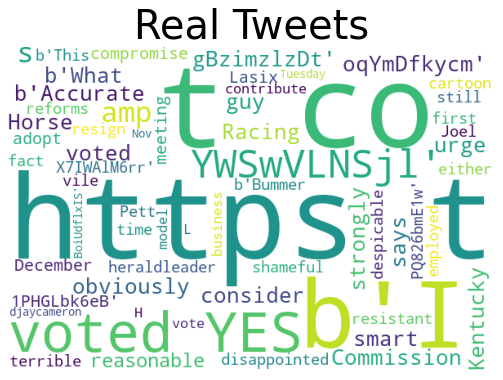

In [37]:
#Lets have a quick look of the tweets in wordcloud
from wordcloud import WordCloud
fig, ax = plt.subplots(figsize=[10, 6])
wordcloud = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(real_tweets))
ax.imshow(wordcloud)
ax.axis('off')
ax.set_title('Real Tweets',fontsize=40);

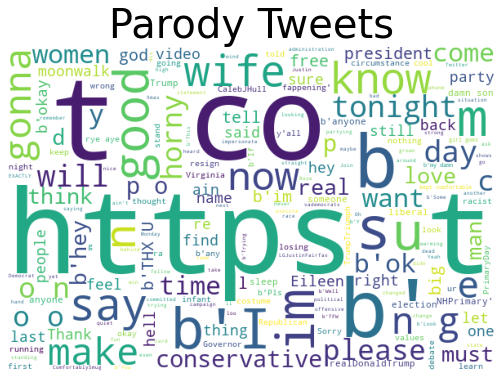

In [38]:
#Lets have a quick look of the tweets in wordcloud
from wordcloud import WordCloud
fig, ax = plt.subplots(figsize=[10, 6])
wordcloud = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(parody_tweets))
ax.imshow(wordcloud)
ax.axis('off')
ax.set_title('Parody Tweets',fontsize=40);

## BiLSTM-Att bidirectional LongShort Term Memory (LSTM)

In [70]:
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Bidirectional
import numpy as np
import pandas as pd

In [79]:
#Copy orignal data in new dataframe
#USUKtrain_df_LSTM=USUKtrain_df.copy()
#ROWtest_df_LSTM=ROWtest_df.copy()

# Lets clean data
#USUKtrain_df_LSTM.tweet_raw=USUKtrain_df_LSTM.tweet_raw.apply(clean_dataset)
#ROWtest_df_LSTM.tweet_raw=ROWtest_df_LSTM.tweet_raw.apply(clean_dataset)

- `vocab_size` is the number of common words that we want — the maximum number of words that will be included in the word index
- `oov_token` is the item that will be used to represent words that will not be found in our vocabulary; this is possible when fitting the tokenizer to the testing set. This is represented using the number 1
- `max_length` is the maximum length of each sequence
- `padding_type` is used to fill zeros either at the beginning or at the end of a sequence
- `trunction_type` indicates whether to truncate sentences longer than the max_lenth at the beginning or at the end

In [71]:
vocab_size = 5000
oov_token = "<OOV>"
max_length = 50
padding_type = "post"
trunction_type="post"

In [72]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(USUKtrain_df_LSTM.tweet_raw)

In [73]:
word_index = tokenizer.word_index

### Create Sequences
Let’s now convert the sentences into tokenized sequences. This is done using the texts_to_sequences function.

In [74]:
X_train_sequences = tokenizer.texts_to_sequences(USUKtrain_df_LSTM.tweet_raw)

### Pad the Sequences
We can clearly see that the sequences are not of the same length, so let’s pad them to make them of similar length — important before we can pass the data to a deep learning model.

In [75]:
X_train_padded = pad_sequences(X_train_sequences,maxlen=max_length, padding=padding_type, 
                       truncating=trunction_type)

We can now see that there are zeros at the end of the sequences, which makes them all the same length. The padding is taking place at the end of the sequence because we specified the padding type as `post`.

In [76]:
X_train_padded

array([[1700,   41,    1, ...,    0,    0,    0],
       [ 831,  239, 1297, ...,    0,    0,    0],
       [ 191,  806,    1, ...,    0,    0,    0],
       ...,
       [   1,  888,    1, ...,    0,    0,    0],
       [  20,    1,    1, ...,    0,    0,    0],
       [  64, 2507, 1030, ...,    0,    0,    0]])

Now let’s do the same thing to the testing set.

In [77]:
X_test_sequences = tokenizer.texts_to_sequences(ROWtest_df_LSTM.tweet_raw)
X_test_padded = pad_sequences(X_test_sequences,maxlen=max_length, 
                               padding=padding_type, truncating=trunction_type)

In [78]:
X_test_padded

array([[1279, 3651,    0, ...,    0,    0,    0],
       [ 115, 3552,    1, ...,    0,    0,    0],
       [  54,  306,   74, ...,    0,    0,    0],
       ...,
       [3853,  609,  336, ...,    0,    0,    0],
       [ 315,   73,  405, ...,    0,    0,    0],
       [1169, 2975,  605, ...,    0,    0,    0]])

### Prepare GloVe Embeddings

We’ll use pre-trained embeddings—specifically GloVe embeddings. 
We start by loading in the GloVe embedding and appending them to a dictionary.


In [79]:
# Loading glove embeddings
embeddings_index = {}
f = open('./glove.6B/glove.6B.200d.txt',
         encoding="utf-8")
for line in f:
    values = line.strip().split(' ')
    word = values[0] # the first entry is the word
    coefs = np.asarray(values[1:], dtype='float32') #100d vectors representing the word
    embeddings_index[word] = coefs
f.close()

In [80]:
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


Next we need to creating an embedding matrix for each word in the training set. This is done by obtaining the embedding vector for each word from the embedding_index.

In [81]:
embedding_matrix = np.zeros((len(word_index) + 1, 200))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

Words not found in the embedding index will have a matrix representation with all zeros.

In [82]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.0010255 ,  0.034021  ,  0.044078  , ...,  0.20020001,
        -0.36337   ,  0.28939   ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.18352   ,  0.18776999,  0.56704003, ..., -0.014287  ,
         0.23171   ,  0.11982   ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

### Embedding Layer
- We can now prepare the embedding layer:
- We set `trainable` to False because we are using pre-trained word embeddings
- We set the `weights` to be the embedding_matrix we created above
- `len(word_index) + 1` is the size of the vocabulary. We add one because 0 is never use— it is reserved for padding
- `input_length` is the length the input sequences

In [83]:
embedding_layer = Embedding(len(word_index) + 1,200,weights=[embedding_matrix],
                            input_length=max_length,trainable=False)

### Define the Model

In [84]:
from keras.layers import Dropout

In [85]:
embedding_dim = 16
input_length = 100
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(embedding_dim, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(embedding_dim)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [86]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 200)           9945400   
_________________________________________________________________
dropout (Dropout)            (None, 50, 200)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 50, 32)            27776     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 32)            0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 32)                6272      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 9,979,481
Trainable params: 34,081
Non-trainable params: 9,945,400
_________________________________________

In [87]:
#Early stopping As soon as the loss of the model begins to increase on the test dataset, we will stop training.
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [88]:
history = model.fit(X_train_padded, USUKtrain_df.label, epochs=10, batch_size=64,
                    validation_data=(X_test_padded, ROWtest_df.label))

Epoch 1/10
1341/1341 [==============================] - 118s 81ms/step - loss: 0.5105 - accuracy: 0.7547 - val_loss: 0.5134 - val_accuracy: 0.7539
Epoch 2/10
1341/1341 [==============================] - 105s 78ms/step - loss: 0.4440 - accuracy: 0.7960 - val_loss: 0.5026 - val_accuracy: 0.7607
Epoch 3/10
1341/1341 [==============================] - 105s 79ms/step - loss: 0.4210 - accuracy: 0.8102 - val_loss: 0.5028 - val_accuracy: 0.7630
Epoch 4/10
1341/1341 [==============================] - 104s 78ms/step - loss: 0.4158 - accuracy: 0.8143 - val_loss: 0.5106 - val_accuracy: 0.7622
Epoch 5/10
1341/1341 [==============================] - 104s 78ms/step - loss: 0.4014 - accuracy: 0.8210 - val_loss: 0.5261 - val_accuracy: 0.7448
Epoch 6/10
1341/1341 [==============================] - 104s 77ms/step - loss: 0.3970 - accuracy: 0.8238 - val_loss: 0.5152 - val_accuracy: 0.7520
Epoch 7/10
1341/1341 [==============================] - 105s 78ms/step - loss: 0.3851 - accuracy: 0.8309 - val_loss: 0

1091/1091 [==============================] - 16s 15ms/step - loss: 0.5160 - accuracy: 0.7590
Train: 0.855, Test: 0.759


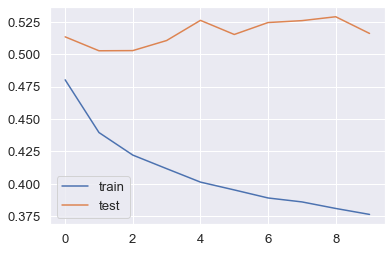

In [89]:
# evaluate the model
_, train_acc = model.evaluate(X_train_padded, USUKtrain_df.label, verbose=1)
_, test_acc = model.evaluate(X_test_padded,  ROWtest_df.label, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

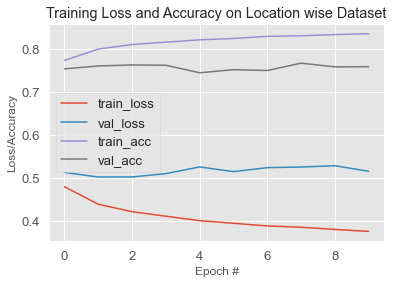

In [90]:
# plot the training loss and accuracy
N = 10
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Location wise Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")
plt.savefig("ModelAccuracy(ROWTest-BiLSTM-Att)")

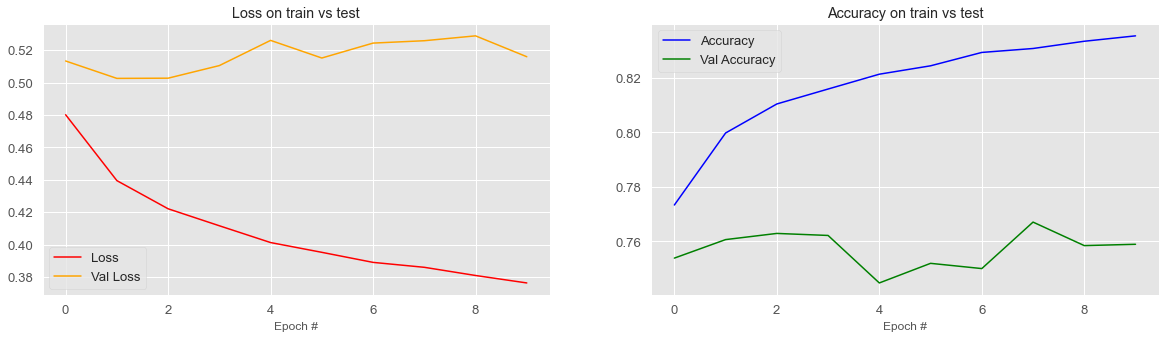

In [91]:
plt.figure(figsize=(20,5))

# plot loss & val loss
plt.subplot(1,2,1)
sns.lineplot(x=history.epoch, y=history.history['loss'], color='red', label='Loss')
sns.lineplot(x=history.epoch, y=history.history['val_loss'], color='orange', label='Val Loss')
plt.title('Loss on train vs test')
plt.xlabel("Epoch #")
plt.legend(loc='best')
plt.savefig("Model Loss(ROWTest-BiLSTM-Att)")
# plot accuracy and val accuracy
plt.subplot(1,2,2)
sns.lineplot(x=history.epoch, y=history.history['accuracy'], color='blue', label='Accuracy')
sns.lineplot(x=history.epoch, y=history.history['val_accuracy'], color='green', label='Val Accuracy')
plt.title('Accuracy on train vs test')
plt.xlabel("Epoch #")
plt.legend(loc='best')
plt.savefig("Model Accuracy (ROWTest-BiLSTM-Att)")
plt.show()

#### Confusion matrix on test data

In [92]:
y_test_hat = model.predict(X_test_padded, batch_size=64)
y_test_hat = np.round(y_test_hat)

In [93]:
conf_m = confusion_matrix(y_test_hat,ROWtest_df.label)
clas_r = classification_report(y_test_hat,ROWtest_df.label, )

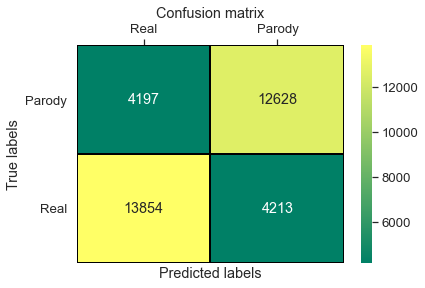

Classification report on test data
              precision    recall  f1-score   support

         0.0       0.77      0.77      0.77     18067
         1.0       0.75      0.75      0.75     16825

    accuracy                           0.76     34892
   macro avg       0.76      0.76      0.76     34892
weighted avg       0.76      0.76      0.76     34892



In [94]:
# plot confusion matrix as heatmap

sns.set(font_scale=1.2)
ax = sns.heatmap(conf_m, annot=True,xticklabels=['Real', 'Parody'], yticklabels=['Real', 'Parody'], 
                 cbar=True, cmap='summer',linewidths=1, linecolor='black', fmt='.0f')
plt.yticks(rotation=0)
ax.set_ylim([0,2])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
ax.xaxis.set_ticks_position('top') 
plt.title('Confusion matrix')
plt.show()

# print classification report
print('Classification report on test data')
print(clas_r)

## 3.2) US & ROW Training Data and UK testing data

In [112]:
# Read the dataset csv files and create pandas datframes
USROWtrain_df=pd.read_csv("./location/test_on_uk/usintltrain.csv")
UKtest_df=pd.read_csv("./location/test_on_uk/uktest.csv") 
print("Train and Test data sets are imported successfully")

Train and Test data sets are imported successfully


In [96]:
# Define a function to explore the train and test dataframes
def explore_data(df):
    
    '''Input- df= pandas dataframes to be explored
       Output- print shape, info and first 5 records of the dataframe 
    '''
    
    print("-"*50)
    print('Shape of the dataframe:',df.shape)
    print("Number of records in train data set:",df.shape[0])
    print("Information of the dataset:")
    df.info()
    print("-"*50)
    print("First 5 records of the dataset:")
    return df.head()
    print("-"*50)

In [97]:
# Lets use explore_data() function to explore train data
explore_data(USROWtrain_df)

--------------------------------------------------
Shape of the dataframe: (91975, 6)
Number of records in train data set: 91975
Information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91975 entries, 0 to 91974
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   91975 non-null  int64 
 1   person     91975 non-null  object
 2   account    91975 non-null  object
 3   tweet_pp   91975 non-null  object
 4   tweet_raw  91975 non-null  object
 5   label      91975 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 4.2+ MB
--------------------------------------------------
First 5 records of the dataset:


tweet_id        person        account  \
0  1190190221813571584  Damon Thayer  @damon_thayer   
1  1189898588534575105  Damon Thayer  @damon_thayer   
2  1189895059665309696  Damon Thayer  @damon_thayer   
3  1189737246473277440  Damon Thayer  @damon_thayer   
4  1189731087028826113  Damon Thayer  @damon_thayer   

                                            tweet_pp  \
0  . <mention> has done a terrific job as state t...   
1  on tuesday , join me in voting <mention> he th...   
2  good story by <mention> in <mention> on some o...   
3  i guess if you count steve beshear going to ro...   
4     i here to make people dreams come true . <url>   

                                           tweet_raw  label  
0  b'.@AllisonJoyBall has done a terrific job as ...      1  
1  b'On Tuesday, join me in voting @Adams4SecStat...      1  
2  b'Good story by @flysofree in @paulickreport o...      1  
3  b'I guess if you count Steve Beshear going to ...      1  
4  b'I’m here to make people’s dreams come true. ...      1

In [99]:
# Lets use explore_data() function to explore test data
explore_data(UKtest_df)

--------------------------------------------------
Shape of the dataframe: (36418, 6)
Number of records in train data set: 36418
Information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36418 entries, 0 to 36417
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   36418 non-null  int64 
 1   person     36418 non-null  object
 2   account    36418 non-null  object
 3   tweet_pp   36418 non-null  object
 4   tweet_raw  36418 non-null  object
 5   label      36418 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.7+ MB
--------------------------------------------------
First 5 records of the dataset:


tweet_id           person           account  \
0  1095001019652681728       Ken Clarke  @MrKennethClarke   
1  1126003800324448257    Jeremy Corbyn     @jeremycorbyn   
2   481734309871902720    Steve Barclay     @SteveBarclay   
3   956119057685729285   Philip Hannond  @PhilipHammondUK   
4  1144373983325892609  David Lidington       @DLidington   

                                            tweet_pp  \
0  said happy birthday to dennis skinner who is 8...   
1  uber cannot be allowed to get away with huge p...   
2  it was a pleasure to join the block fen animal...   
3  record high employment , including record fema...   
4  chatting to students & staff <mention> #manche...   

                                           tweet_raw  label  
0  b'Said Happy Birthday to Dennis Skinner who is...      0  
1  b'Uber cannot be allowed to get away with huge...      1  
2  b'It was a pleasure to join the Block Fen Anim...      1  
3  b'Record high employment, including record fem...      1  
4  b"Chatting to students &amp; staff @CoopAcadem...      1

In [100]:
#Lets visulaize dataframe features using charts
def feature_viz(df,feature):
    
    '''Input- df=pandas dataframe
              feature= column to be charted
       Output- bar and scatter chart using plotly       
    
    '''
    #Visualize the feature
    if feature=='label':
        sns.countplot(feature, data=df)
        print('Label of 0 is {} % of total'.format(round(df[feature].value_counts()[0]/len(df[feature])*100)))
        print('Label of 1 is {} % of total'.format(round(df[feature].value_counts()[1]/len(df[feature])*100)))
    else:
        #Distinct keywords in train dataset
        feat=df[feature].value_counts()
        print(feat.head())
        fig = px.scatter(feat, x=feat.values, y=feat.index,size=feat.values)
        fig.show()

Label of 0 is 49 % of total
Label of 1 is 51 % of total


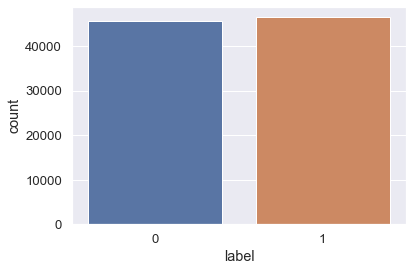

In [101]:
#Lets use feature_viz function to create charts for 'target' column
feature_viz(USROWtrain_df,'label')

Lee Hsien Loong     6149
Hillary Clinton     5171
Rahul Gandhi        5124
Barack Obama        4488
Muhammadu Buhari    3922
Name: person, dtype: int64


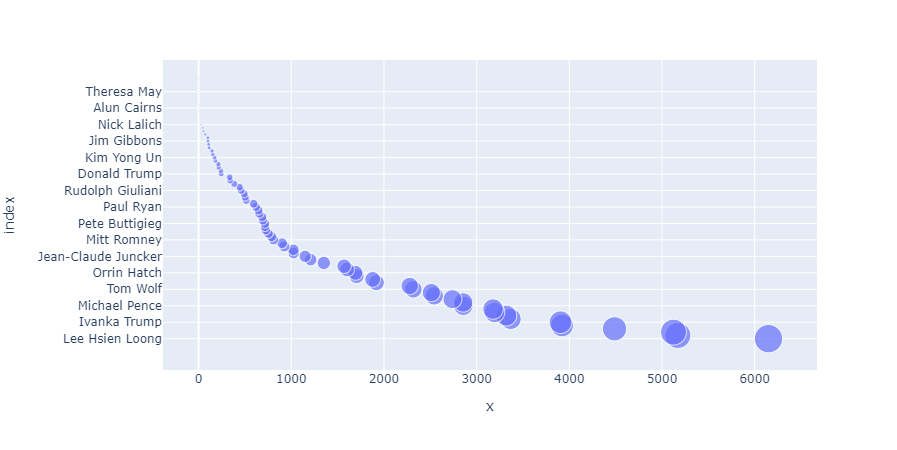

In [102]:
feature_viz(USROWtrain_df,'person')

In [103]:
# Lets find the length of the 'tweet_raw' for each row and add a new cloumn to persontrain dataframe 
USROWtrain_df['tweet_raw_length'] = USROWtrain_df['tweet_raw'].apply(lambda x : len(x))
USROWtrain_df.head(4)

tweet_id        person        account  \
0  1190190221813571584  Damon Thayer  @damon_thayer   
1  1189898588534575105  Damon Thayer  @damon_thayer   
2  1189895059665309696  Damon Thayer  @damon_thayer   
3  1189737246473277440  Damon Thayer  @damon_thayer   

                                            tweet_pp  \
0  . <mention> has done a terrific job as state t...   
1  on tuesday , join me in voting <mention> he th...   
2  good story by <mention> in <mention> on some o...   
3  i guess if you count steve beshear going to ro...   

                                           tweet_raw  label  tweet_raw_length  
0  b'.@AllisonJoyBall has done a terrific job as ...      1               193  
1  b'On Tuesday, join me in voting @Adams4SecStat...      1               264  
2  b'Good story by @flysofree in @paulickreport o...      1               275  
3  b'I guess if you count Steve Beshear going to ...      1               298

In [104]:
USROWtrain_df.tweet_raw_length.describe()

count    91975.000000
mean       144.220951
std         77.923698
min          4.000000
25%         87.000000
50%        132.000000
75%        190.000000
max        801.000000
Name: tweet_raw_length, dtype: float64

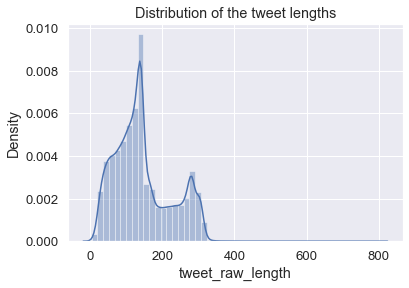

In [105]:
#Create distribution chart to visualize text length distribution
ax=sns.distplot(USROWtrain_df['tweet_raw_length']).set_title('Distribution of the tweet lengths');
plt.grid(True)

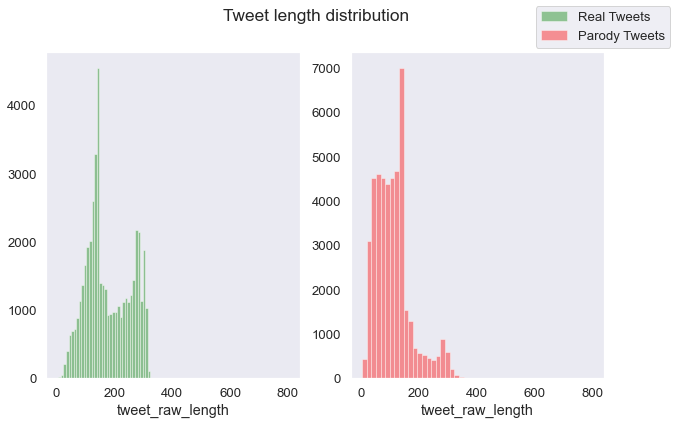

In [106]:
#Create visualization of the distribution of tweet length in comparision to label feature
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True,figsize=(10,6))
sns.distplot(USROWtrain_df[(USROWtrain_df['label'] == 1)]['tweet_raw_length'], ax=ax1, kde=False, color='green',label='Real Tweets')
sns.distplot(USROWtrain_df[(USROWtrain_df['label'] == 0)]['tweet_raw_length'],ax=ax2, kde=False, color='red',label='Parody Tweets');
f.suptitle('Tweet length distribution')
f.legend(loc='upper right')
ax1.grid()
ax2.grid()
plt.show()

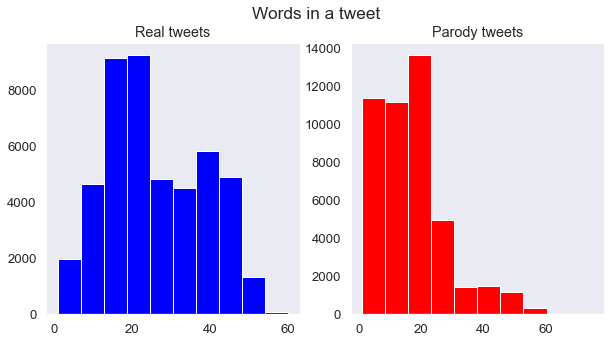

In [107]:
#Create visualization of the distribution of the word counts in comparision to label feature
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
real_tweet=USROWtrain_df[USROWtrain_df['label']==1]['tweet_raw'].str.split().map(lambda x: len(x))
ax1.hist(real_tweet,color='blue')
ax1.set_title('Real tweets')
ax1.grid()
parody_tweet=USROWtrain_df[USROWtrain_df['label']==0]['tweet_raw'].str.split().map(lambda x: len(x))
ax2.hist(parody_tweet,color='red')
ax2.set_title('Parody tweets')
ax2.grid()
fig.suptitle('Words in a tweet')
plt.show()

In [108]:
# A real tweet exmaple
real_tweets=USROWtrain_df[USROWtrain_df['label']==1]['tweet_raw'][10:20]
real_tweets

10    b'What this obviously smart guy says⤵️ https:/...
11              b'I voted YES. https://t.co/YWSwVLNSjl'
12              b'I voted YES. https://t.co/YWSwVLNSjl'
13              b'I voted YES. https://t.co/YWSwVLNSjl'
14              b'I voted YES. https://t.co/YWSwVLNSjl'
15                 b'Accurate. https://t.co/gBzimzlzDt'
16    b'I strongly urge the Kentucky Horse Racing Co...
17    b'I voted YES and am disappointed in those res...
18                 b'Bummer. 😑 https://t.co/X7IWAlM6rr'
19    b'This is a terrible, vile &amp; despicable ca...
Name: tweet_raw, dtype: object

In [109]:
# A parody tweet exmaple
parody_tweets=USROWtrain_df[USROWtrain_df['label']==0]['tweet_raw'][4000:4220]
parody_tweets

50461    b'I’ve said it a thousand times: not everybody...
50462    b'This business ain’t paddy-cake, friend. \n\n...
50463    b'It’s not Donatello but it does the job I sup...
50464    b'@CillizzaCNN Was there a woman in high heels...
50465    b'When you buy them, you own them. That’s why ...
                               ...                        
50676    b'Nice try Judas. I go down, you’re going down...
50677    b'How do ya like me now? https://t.co/Bs6p6jRfeT'
50678    b'Well, now, THAT would be very problematic. \...
50679    b'Man. I was so cool. \n\nhttps://t.co/SaqlxAq...
50680    b'Hit me up @LGJustinFairfax - I know EXACTLY ...
Name: tweet_raw, Length: 220, dtype: object

In [113]:
USROWtrain_df.tweet_raw=USROWtrain_df.tweet_raw.apply(remove_contractions)
UKtest_df.tweet_raw=UKtest_df.tweet_raw.apply(remove_contractions)

In [114]:
#Make original dataset copies before cleaning data

USROWtrain_df1 = USROWtrain_df.copy()
UKtest_df1 = UKtest_df.copy()

In [115]:
USROWtrain_df1.tweet_raw=USROWtrain_df1.tweet_raw.apply(clean_dataset)
UKtest_df1.tweet_raw=UKtest_df1.tweet_raw.apply(clean_dataset)

In [116]:
# making copies of cleaned datasets that i can use further in experiment

USROWtrain_df_POS=USROWtrain_df1.copy()
UKtest_df_POS=UKtest_df1.copy()
USROWtrain_df_LSTM=USROWtrain_df1.copy()
UKtest_df_LSTM=UKtest_df1.copy()

In [117]:
#Lets look cleaned text data
def text_after_preprocess(before_text,after_text):
    
    '''
    Input- before_text=text column before cleanup
              after_text= text column after cleanup
       Output- print before and after text to compare how it looks after cleanup
       
    '''
    print('-'*60)
    print('Text before cleanup')
    print('-'*60)
    print(before_text.head(5))
    print('-'*60)
    print('Text after cleanup')
    print('-'*60)
    print(after_text.head(5))

In [118]:
text_after_preprocess(USROWtrain_df.tweet_raw,USROWtrain_df1.tweet_raw)

------------------------------------------------------------
Text before cleanup
------------------------------------------------------------
0    b'.@AllisonJoyBall has done a terrific job as ...
1    b'On Tuesday, join me in voting @Adams4SecStat...
2    b'Good story by @flysofree in @paulickreport o...
3    b'I guess if you count Steve Beshear going to ...
4    b'I’m here to make people’s dreams come true. ...
Name: tweet_raw, dtype: object
------------------------------------------------------------
Text after cleanup
------------------------------------------------------------
0    terrific state Treasurer promoting transparenc...
1    Tuesday voting qualified SecState candidate st...
2    story Monday meetingLasix compromise blocked d...
3    guess count Steve Beshear going Royal Ascot Lo...
4                                        people dreams
Name: tweet_raw, dtype: object


In [119]:
text_after_preprocess(UKtest_df.tweet_raw,UKtest_df1.tweet_raw)

------------------------------------------------------------
Text before cleanup
------------------------------------------------------------
0    b'Said Happy Birthday to Dennis Skinner who is...
1    b'Uber cannot be allowed to get away with huge...
2    b'It was a pleasure to join the Block Fen Anim...
3    b'Record high employment, including record fem...
4    b"Chatting to students &amp; staff @CoopAcadem...
Name: tweet_raw, dtype: object
------------------------------------------------------------
Text after cleanup
------------------------------------------------------------
0    Happy Birthday Dennis Skinner today replied ne...
1    cannot allowed payouts their while refusing dr...
2                   pleasure Block Animal Centre RSPCA
3    Record employment including record female empl...
4    Chatting studentsstaff Manchester clear strong...
Name: tweet_raw, dtype: object


In [122]:
USROWtrain_df1['tweet_raw'] = USROWtrain_df1['tweet_raw'].apply(lambda x: tokenizer.tokenize(x))
UKtest_df1['tweet_raw'] = UKtest_df1['tweet_raw'].apply(lambda x: tokenizer.tokenize(x))

In [123]:
#Lets check tokenized text
USROWtrain_df1['tweet_raw'].head()

0    [terrific, state, treasurer, promoting, transp...
1    [tuesday, voting, qualified, secstate, candida...
2    [story, monday, meetinglasix, compromise, bloc...
3    [guess, count, steve, beshear, going, royal, a...
4                                     [people, dreams]
Name: tweet_raw, dtype: object

In [124]:
UKtest_df1['tweet_raw'].head()

0    [happy, birthday, dennis, skinner, today, repl...
1    [cannot, allowed, payouts, their, while, refus...
2             [pleasure, block, animal, centre, rspca]
3    [record, employment, including, record, female...
4    [chatting, studentsstaff, manchester, clear, s...
Name: tweet_raw, dtype: object

In [125]:
USROWtrain_df1['tweet_raw'] = USROWtrain_df1['tweet_raw'].apply(lambda x : remove_stopwords(x))
UKtest_df1['tweet_raw'] = UKtest_df1['tweet_raw'].apply(lambda x : remove_stopwords(x))

In [126]:
USROWtrain_df1['tweet_raw'] = USROWtrain_df1['tweet_raw'].apply(lambda x : combine_text(x))
UKtest_df1['tweet_raw'] = UKtest_df1['tweet_raw'].apply(lambda x : combine_text(x))

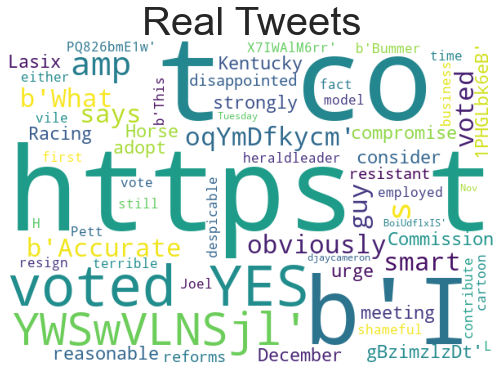

In [127]:
#Lets have a quick look of the tweets in wordcloud
from wordcloud import WordCloud
fig, ax = plt.subplots(figsize=[10, 6])
wordcloud = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(real_tweets))
ax.imshow(wordcloud)
ax.axis('off')
ax.set_title('Real Tweets',fontsize=40);

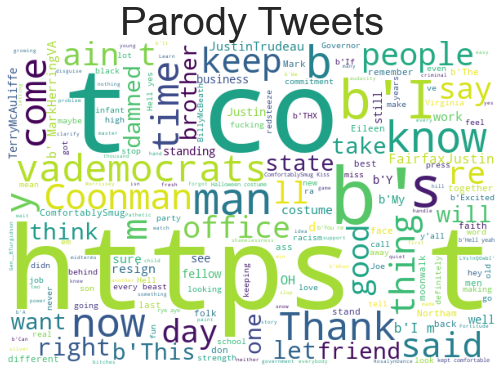

In [128]:
#Lets have a quick look of the tweets in wordcloud
from wordcloud import WordCloud
fig, ax = plt.subplots(figsize=[10, 6])
wordcloud = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(parody_tweets))
ax.imshow(wordcloud)
ax.axis('off')
ax.set_title('Parody Tweets',fontsize=40);

 ## BiLSTM-Att bidirectional LongShort Term Memory (LSTM)

In [155]:
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Bidirectional
import numpy as np
import pandas as pd

In [156]:
vocab_size = 5000
oov_token = "<OOV>"
max_length = 50
padding_type = "post"
trunction_type="post"

In [157]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(USROWtrain_df_LSTM.tweet_raw)

In [158]:
word_index = tokenizer.word_index

In [159]:
X_train_sequences = tokenizer.texts_to_sequences(USROWtrain_df_LSTM.tweet_raw)

In [160]:
X_train_padded = pad_sequences(X_train_sequences,maxlen=max_length, padding=padding_type, 
                       truncating=trunction_type)

In [161]:
X_train_padded

array([[2302,   31,    1, ...,    0,    0,    0],
       [ 874,  271, 1304, ...,    0,    0,    0],
       [ 203,  977,    1, ...,    0,    0,    0],
       ...,
       [ 179,    1,    0, ...,    0,    0,    0],
       [  13,    1,    0, ...,    0,    0,    0],
       [2127,   30,  131, ...,    0,    0,    0]])

In [162]:
X_test_sequences = tokenizer.texts_to_sequences(UKtest_df_LSTM.tweet_raw)
X_test_padded = pad_sequences(X_test_sequences,maxlen=max_length, 
                               padding=padding_type, truncating=trunction_type)

In [163]:
X_test_padded

array([[  33,  237,    1, ...,    0,    0,    0],
       [ 216,  774,    1, ...,    0,    0,    0],
       [ 933, 1222, 2679, ...,    0,    0,    0],
       ...,
       [ 316,  128,    1, ...,    0,    0,    0],
       [ 316, 3419, 1424, ...,    0,    0,    0],
       [  50,    1,    0, ...,    0,    0,    0]])

In [164]:
# Loading glove embeddings
embeddings_index = {}
f = open('./glove.6B/glove.6B.200d.txt',
         encoding="utf-8")
for line in f:
    values = line.strip().split(' ')
    word = values[0] # the first entry is the word
    coefs = np.asarray(values[1:], dtype='float32') #100d vectors representing the word
    embeddings_index[word] = coefs
f.close()

In [165]:
embedding_matrix = np.zeros((len(word_index) + 1, 200))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [166]:
embedding_layer = Embedding(len(word_index) + 1,200,weights=[embedding_matrix],
                            input_length=max_length,trainable=False)

In [167]:
embedding_dim = 16
input_length = 100
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(embedding_dim, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(embedding_dim)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [168]:
history = model.fit(X_train_padded, USROWtrain_df.label, epochs=10, batch_size=64,
                    validation_data=(X_test_padded, UKtest_df.label))

Epoch 1/10
1438/1438 [==============================] - 119s 76ms/step - loss: 0.5023 - accuracy: 0.7521 - val_loss: 0.4855 - val_accuracy: 0.7737
Epoch 2/10
1438/1438 [==============================] - 110s 77ms/step - loss: 0.4279 - accuracy: 0.8059 - val_loss: 0.4894 - val_accuracy: 0.7760
Epoch 3/10
1438/1438 [==============================] - 112s 78ms/step - loss: 0.4067 - accuracy: 0.8172 - val_loss: 0.4902 - val_accuracy: 0.7697
Epoch 4/10
1438/1438 [==============================] - 110s 76ms/step - loss: 0.3913 - accuracy: 0.8272 - val_loss: 0.4795 - val_accuracy: 0.7791
Epoch 5/10
1438/1438 [==============================] - 110s 77ms/step - loss: 0.3831 - accuracy: 0.8311 - val_loss: 0.4964 - val_accuracy: 0.7715
Epoch 6/10
1438/1438 [==============================] - 110s 77ms/step - loss: 0.3761 - accuracy: 0.8355 - val_loss: 0.4952 - val_accuracy: 0.7775
Epoch 7/10
1438/1438 [==============================] - 109s 76ms/step - loss: 0.3685 - accuracy: 0.8373 - val_loss: 0

1139/1139 [==============================] - 18s 15ms/step - loss: 0.5069 - accuracy: 0.7745
Train: 0.859, Test: 0.775


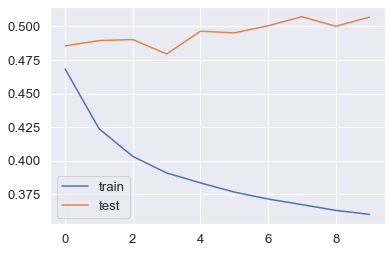

In [169]:
# evaluate the model
_, train_acc = model.evaluate(X_train_padded, USROWtrain_df.label, verbose=1)
_, test_acc = model.evaluate(X_test_padded,  UKtest_df.label, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [170]:
#Model Accuracy
(loss, accuracy) = model.evaluate(X_test_padded, UKtest_df.label, batch_size=64, verbose=1)

570/570 [==============================] - 11s 19ms/step - loss: 0.5069 - accuracy: 0.77450s - loss: 0.5063 - accuracy: 0.


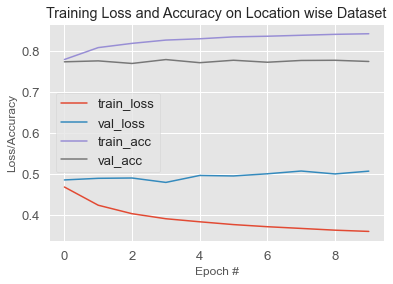

In [171]:
# plot the training loss and accuracy
N = 10
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Location wise Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")
plt.savefig("ModelAccuracy(UKTest-BiLSTM-Att)")

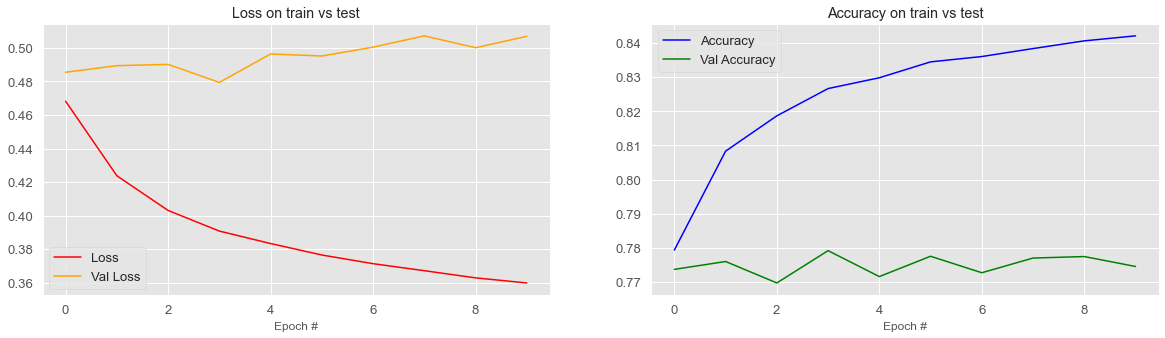

In [172]:
plt.figure(figsize=(20,5))

# plot loss & val loss
plt.subplot(1,2,1)
sns.lineplot(x=history.epoch, y=history.history['loss'], color='red', label='Loss')
sns.lineplot(x=history.epoch, y=history.history['val_loss'], color='orange', label='Val Loss')
plt.title('Loss on train vs test')
plt.xlabel("Epoch #")
plt.legend(loc='best')
plt.savefig("Model Loss(UKTest-BiLSTM-Att)")
# plot accuracy and val accuracy
plt.subplot(1,2,2)
sns.lineplot(x=history.epoch, y=history.history['accuracy'], color='blue', label='Accuracy')
sns.lineplot(x=history.epoch, y=history.history['val_accuracy'], color='green', label='Val Accuracy')
plt.title('Accuracy on train vs test')
plt.xlabel("Epoch #")
plt.legend(loc='best')
plt.savefig("Model Accuracy (UKTest-BiLSTM-Att)")
plt.show()

In [173]:
y_test_hat = model.predict(X_test_padded, batch_size=64)
y_test_hat = np.round(y_test_hat)

In [174]:
conf_m = confusion_matrix(y_test_hat,UKtest_df.label)
clas_r = classification_report(y_test_hat,UKtest_df.label)

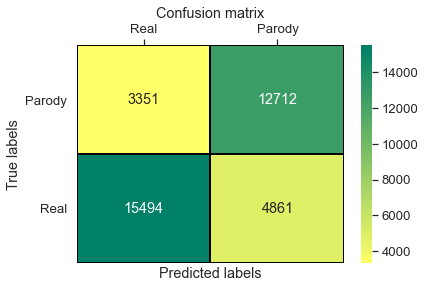

Classification report on test data
              precision    recall  f1-score   support

         0.0       0.82      0.76      0.79     20355
         1.0       0.72      0.79      0.76     16063

    accuracy                           0.77     36418
   macro avg       0.77      0.78      0.77     36418
weighted avg       0.78      0.77      0.78     36418



In [175]:
# plot confusion matrix as heatmap

sns.set(font_scale=1.2)
ax = sns.heatmap(conf_m, annot=True,xticklabels=['Real', 'Parody'], yticklabels=['Real', 'Parody'], 
                 cbar=True, cmap='summer_r',linewidths=1, linecolor='black', fmt='.0f')
plt.yticks(rotation=0)
ax.set_ylim([0,2])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
ax.xaxis.set_ticks_position('top') 
plt.title('Confusion matrix')
plt.show()

# print classification report
print('Classification report on test data')
print(clas_r)

## 3.3) UK & ROW Training Data and US testing data

In [176]:
# Read the dataset csv files and create pandas datframes
UKROWtrain_df=pd.read_csv("./location/test_on_us/ukintltrain.csv")
UStest_df=pd.read_csv("./location/test_on_us/ustest.csv") 
print("Train and Test data sets are imported successfully")

Train and Test data sets are imported successfully


In [177]:
# Define a function to explore the train and test dataframes
def explore_data(df):
    
    '''Input- df= pandas dataframes to be explored
       Output- print shape, info and first 5 records of the dataframe 
    '''
    
    print("-"*50)
    print('Shape of the dataframe:',df.shape)
    print("Number of records in train data set:",df.shape[0])
    print("Information of the dataset:")
    df.info()
    print("-"*50)
    print("First 5 records of the dataset:")
    return df.head()
    print("-"*50)

In [179]:
# Lets use explore_data() function to explore train data
explore_data(UKROWtrain_df)

--------------------------------------------------
Shape of the dataframe: (48075, 6)
Number of records in train data set: 48075
Information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48075 entries, 0 to 48074
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   48075 non-null  int64 
 1   person     48075 non-null  object
 2   account    48075 non-null  object
 3   tweet_pp   48075 non-null  object
 4   tweet_raw  48075 non-null  object
 5   label      48075 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 2.2+ MB
--------------------------------------------------
First 5 records of the dataset:


tweet_id             person           account  \
0  1173942444821536768  Chrystya Freeland  @ChrystyaFreela1   
1  1125337325716877312      Jeremy Corbyn     @jeremycorbyn   
2   649693703817269248       Alex Salmond      @AlexSalmond   
3   558731816472170497      Angela Merkel     @Queen_Europe   
4  1111321817099235330      Jeremy Corbyn       @CorbynSnap   

                                            tweet_pp  \
0  <mention> <mention> careful or he threaten to ...   
1  bees are vital to the environment and are impo...   
2  press release : salmond welcomes standards com...   
3  spent a lovely day with <mention> . fortunatel...   
4  i actually wanted to be pictured stripped to t...   

                                           tweet_raw  label  
0  b'@JacquiDelaney @TOAdamVaughan Careful or he’...      0  
1  b'Bees are vital to the environment and are im...      1  
2  b"Press release: Salmond welcomes Standards Co...      1  
3  b"Spent a lovely day with @matteorenzi. Fortun...      0  
4  b'I actually wanted to be pictured stripped to...      0

In [180]:
# Lets use explore_data() function to explore test data
explore_data(UStest_df)

--------------------------------------------------
Shape of the dataframe: (48704, 6)
Number of records in train data set: 48704
Information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48704 entries, 0 to 48703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   48704 non-null  int64 
 1   person     48704 non-null  object
 2   account    48704 non-null  object
 3   tweet_pp   48704 non-null  object
 4   tweet_raw  48704 non-null  object
 5   label      48704 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 2.2+ MB
--------------------------------------------------
First 5 records of the dataset:


tweet_id            person         account  \
0  1047906516576161792         Paul Ryan    @speakerryan   
1  1046832116191846400    Bernie Sanders     @SenSanders   
2   830895778398887936     Michael Pence  @Michael_Pense   
3   753183056031121408      Richard Burr    @RichardBurp   
4  1178754352774647808  Rudolph Giuliani  @MayorGiuliani   

                                            tweet_pp  \
0  another week for our economy : consumer confid...   
1  after a seaworld trainer was drowned by a kill...   
2  <mention> keeps asking me to continue working ...   
3  senate passed my resolution recognizing often ...   
4  <mention> ... and the son of ukrainian immigra...   

                                           tweet_raw  label  
0  b'Another 💪 week for our economy:\n✔ Consumer ...      1  
1  b'After a SeaWorld trainer was drowned by a ki...      1  
2  b'@realDonaldTrump keeps asking me to continue...      0  
3  b'Senate passed my resolution recognizing ofte...      0  
4  b"@BetoORourke ...and the son of Ukrainian imm...      0

In [181]:
#Lets visulaize dataframe features using charts
def feature_viz(df,feature):
    
    '''Input- df=pandas dataframe
              feature= column to be charted
       Output- bar and scatter chart using plotly       
    
    '''
    #Visualize the feature
    if feature=='label':
        sns.countplot(feature, data=df)
        print('Label of 0 is {} % of total'.format(round(df[feature].value_counts()[0]/len(df[feature])*100)))
        print('Label of 1 is {} % of total'.format(round(df[feature].value_counts()[1]/len(df[feature])*100)))
    else:
        #Distinct keywords in train dataset
        feat=df[feature].value_counts()
        print(feat.head())
        fig = px.scatter(feat, x=feat.values, y=feat.index,size=feat.values)
        fig.show()

Label of 0 is 52 % of total
Label of 1 is 48 % of total


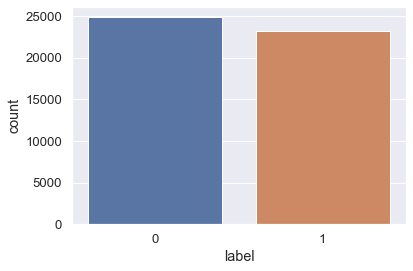

In [182]:
#Lets use feature_viz function to create charts for 'target' column
feature_viz(UKROWtrain_df,'label')

Lee Hsien Loong     4286
Rahul Gandhi        3583
Steve Barclay       3072
Nick Boles          2847
Muhammadu Buhari    2754
Name: person, dtype: int64


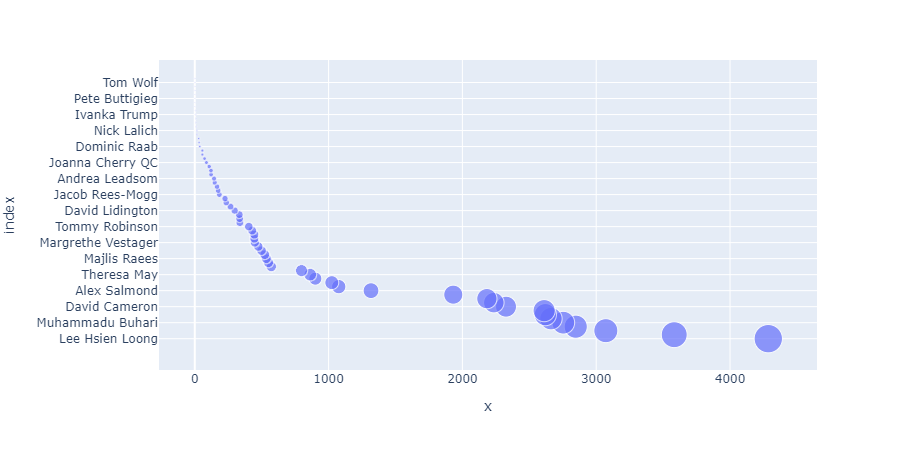

In [183]:
feature_viz(UKROWtrain_df,'person')

In [184]:
# Lets find the length of the 'tweet_raw' for each row and add a new cloumn to persontrain dataframe 
UKROWtrain_df['tweet_raw_length'] = UKROWtrain_df['tweet_raw'].apply(lambda x : len(x))
UKROWtrain_df.head(4)

tweet_id             person           account  \
0  1173942444821536768  Chrystya Freeland  @ChrystyaFreela1   
1  1125337325716877312      Jeremy Corbyn     @jeremycorbyn   
2   649693703817269248       Alex Salmond      @AlexSalmond   
3   558731816472170497      Angela Merkel     @Queen_Europe   

                                            tweet_pp  \
0  <mention> <mention> careful or he threaten to ...   
1  bees are vital to the environment and are impo...   
2  press release : salmond welcomes standards com...   
3  spent a lovely day with <mention> . fortunatel...   

                                           tweet_raw  label  tweet_raw_length  
0  b'@JacquiDelaney @TOAdamVaughan Careful or he’...      0                96  
1  b'Bees are vital to the environment and are im...      1               209  
2  b"Press release: Salmond welcomes Standards Co...      1               116  
3  b"Spent a lovely day with @matteorenzi. Fortun...      0               115

In [185]:
UKROWtrain_df.tweet_raw_length.describe()

count    48075.000000
mean       142.464878
std         72.341181
min          4.000000
25%         91.000000
50%        135.000000
75%        176.000000
max        488.000000
Name: tweet_raw_length, dtype: float64

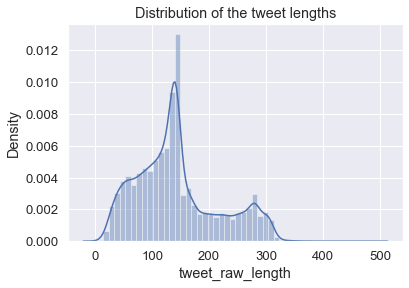

In [186]:
#Create distribution chart to visualize text length distribution
ax=sns.distplot(UKROWtrain_df['tweet_raw_length']).set_title('Distribution of the tweet lengths');
plt.grid(True)

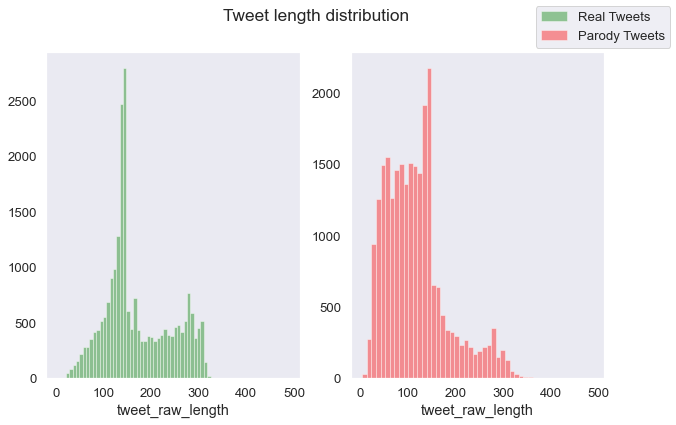

In [187]:
#Create visualization of the distribution of tweet length in comparision to label feature
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True,figsize=(10,6))
sns.distplot(UKROWtrain_df[(UKROWtrain_df['label'] == 1)]['tweet_raw_length'], ax=ax1, kde=False, color='green',label='Real Tweets')
sns.distplot(UKROWtrain_df[(UKROWtrain_df['label'] == 0)]['tweet_raw_length'],ax=ax2, kde=False, color='red',label='Parody Tweets');
f.suptitle('Tweet length distribution')
f.legend(loc='upper right')
ax1.grid()
ax2.grid()
plt.show()

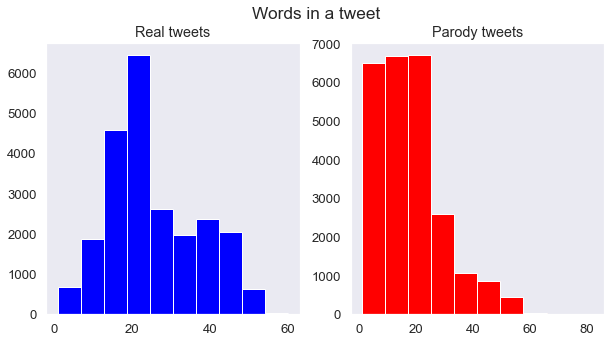

In [188]:
#Create visualization of the distribution of the word counts in comparision to label feature
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
real_tweet=UKROWtrain_df[UKROWtrain_df['label']==1]['tweet_raw'].str.split().map(lambda x: len(x))
ax1.hist(real_tweet,color='blue')
ax1.set_title('Real tweets')
ax1.grid()
parody_tweet=UKROWtrain_df[UKROWtrain_df['label']==0]['tweet_raw'].str.split().map(lambda x: len(x))
ax2.hist(parody_tweet,color='red')
ax2.set_title('Parody tweets')
ax2.grid()
fig.suptitle('Words in a tweet')
plt.show()

In [189]:
# A real tweet exmaple
real_tweets=UKROWtrain_df[UKROWtrain_df['label']==1]['tweet_raw'][10:20]
real_tweets

25    b'A pleasure to present awards at the March Ai...
26    b'Wrote to Lord Hall asking #BBC to review pay...
28    b'Pic from hotel window in Jakarta.  The helic...
29    b'Nelson Mandela was born 100 years ago today....
33    b'.@Europarl_EN looks impressive and is impres...
36    b'उत्तर-प्रदेश, राजस्थान में आए आँधी-तूफान के ...
37    b'It’s good news that inflation remains low wh...
39    b'Continued discussion with @mariofcenteno on ...
41    b'I would like to wish Jewish people across th...
42    b'President ⁦@KolindaGK⁩ welcomes President ⁦@...
Name: tweet_raw, dtype: object

In [190]:
# A parody tweet exmaple
parody_tweets=UKROWtrain_df[UKROWtrain_df['label']==0]['tweet_raw'][4000:4220]
parody_tweets

7164    b"@PolhomeEditor Wasn't that standard practise...
7165    b'So proud of my work on the environment. Conf...
7167    b'Breaking: Sheila cares as little about autis...
7170    b"Me - Yemi, look at how much they said you st...
7177    b'Thankfully, @UkLabour’s #Brexit policy is no...
                              ...                        
7553          b"Prophet Mohamed's democracy? @abkhaleel."
7556    b"I would renegotiate #NAFTA just as like I di...
7558    b"Good morning my Hard working friends. Bet yo...
7559    b'If it wasn’t for the guy on the left, you’d ...
7563    b'Seems like North Korea just celebrated Frida...
Name: tweet_raw, Length: 220, dtype: object

In [191]:
UKROWtrain_df.tweet_raw=UKROWtrain_df.tweet_raw.apply(remove_contractions)
UStest_df.tweet_raw=UStest_df.tweet_raw.apply(remove_contractions)

In [192]:
#Make original dataset copies before cleaning data

UKROWtrain_df1 = UKROWtrain_df.copy()
UStest_df1 = UStest_df.copy()

In [193]:
UKROWtrain_df1.tweet_raw=UKROWtrain_df1.tweet_raw.apply(clean_dataset)
UStest_df1.tweet_raw=UStest_df1.tweet_raw.apply(clean_dataset)

In [194]:
# making copies of cleaned datasets that i can use further in experiment

UKROWtrain_df_POS=UKROWtrain_df1.copy()
UStest_df_POS=UStest_df1.copy()
UKROWtrain_df_LSTM=UKROWtrain_df1.copy()
UStest_df_LSTM=UStest_df1.copy()

In [195]:
#Lets look cleaned text data
def text_after_preprocess(before_text,after_text):
    
    '''
    Input- before_text=text column before cleanup
              after_text= text column after cleanup
       Output- print before and after text to compare how it looks after cleanup
       
    '''
    print('-'*60)
    print('Text before cleanup')
    print('-'*60)
    print(before_text.head(5))
    print('-'*60)
    print('Text after cleanup')
    print('-'*60)
    print(after_text.head(5))

In [196]:
text_after_preprocess(UKROWtrain_df.tweet_raw,UKROWtrain_df1.tweet_raw)

------------------------------------------------------------
Text before cleanup
------------------------------------------------------------
0    b'@JacquiDelaney @TOAdamVaughan Careful or he’...
1    b'Bees are vital to the environment and are im...
2    b"Press release: Salmond welcomes Standards Co...
3    b"Spent a lovely day with @matteorenzi. Fortun...
4    b'I actually wanted to be pictured stripped to...
Name: tweet_raw, dtype: object
------------------------------------------------------------
Text after cleanup
------------------------------------------------------------
0                               Careful threaten whack
1    vital environment important pollinators third ...
2    Press release Salmond welcomes Standards Commi...
3       Spent lovely Fortunately Mario bazooka display
4    actually wanted pictured stripped waist favour...
Name: tweet_raw, dtype: object


In [197]:
text_after_preprocess(UStest_df.tweet_raw,UStest_df1.tweet_raw)

------------------------------------------------------------
Text before cleanup
------------------------------------------------------------
0    b'Another 💪 week for our economy:\n✔ Consumer ...
1    b'After a SeaWorld trainer was drowned by a ki...
2    b'@realDonaldTrump keeps asking me to continue...
3    b'Senate passed my resolution recognizing ofte...
4    b"@BetoORourke ...and the son of Ukrainian imm...
Name: tweet_raw, dtype: object
------------------------------------------------------------
Text after cleanup
------------------------------------------------------------
0    Another economy heavy check mark Consumer conf...
1    After SeaWorld trainer drowned killer whale Ju...
2    keeps asking continue working proving indeed p...
3    Senate passed resolution recognizing often uns...
4    Ukrainian immigrants trying reason thinks name...
Name: tweet_raw, dtype: object


In [200]:
UKROWtrain_df1['tweet_raw'] = UKROWtrain_df1['tweet_raw'].apply(lambda x: tokenizer.tokenize(x))
UStest_df1['tweet_raw'] = UStest_df1['tweet_raw'].apply(lambda x: tokenizer.tokenize(x))

In [201]:
#Lets check tokenized text
UKROWtrain_df1['tweet_raw'].head()

0                           [careful, threaten, whack]
1    [vital, environment, important, pollinators, t...
2    [press, release, salmond, welcomes, standards,...
3    [spent, lovely, fortunately, mario, bazooka, d...
4    [actually, wanted, pictured, stripped, waist, ...
Name: tweet_raw, dtype: object

In [202]:
UStest_df1['tweet_raw'].head()

0    [another, economy, heavy, check, mark, consume...
1    [after, seaworld, trainer, drowned, killer, wh...
2    [keeps, asking, continue, working, proving, in...
3    [senate, passed, resolution, recognizing, ofte...
4    [ukrainian, immigrants, trying, reason, thinks...
Name: tweet_raw, dtype: object

In [203]:
UKROWtrain_df1['tweet_raw'] = UKROWtrain_df1['tweet_raw'].apply(lambda x : remove_stopwords(x))
UStest_df1['tweet_raw'] = UStest_df1['tweet_raw'].apply(lambda x : remove_stopwords(x))

In [204]:
UKROWtrain_df1['tweet_raw'] = UKROWtrain_df1['tweet_raw'].apply(lambda x : combine_text(x))
UStest_df1['tweet_raw'] = UStest_df1['tweet_raw'].apply(lambda x : combine_text(x))

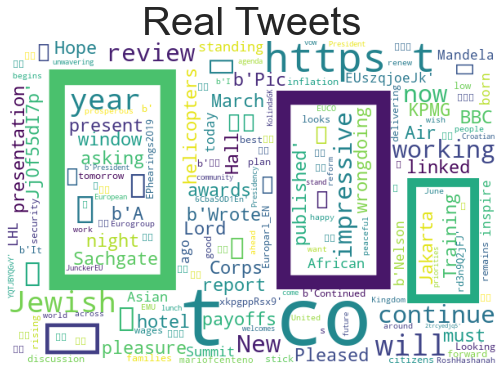

In [205]:
#Lets have a quick look of the tweets in wordcloud
from wordcloud import WordCloud
fig, ax = plt.subplots(figsize=[10, 6])
wordcloud = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(real_tweets))
ax.imshow(wordcloud)
ax.axis('off')
ax.set_title('Real Tweets',fontsize=40);

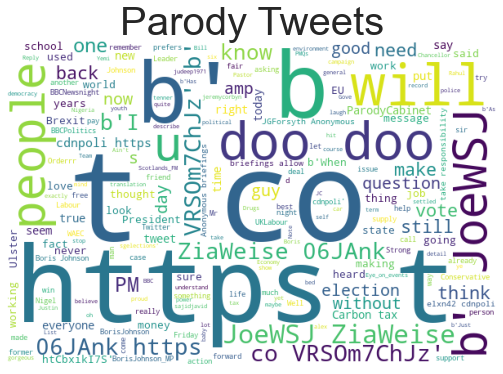

In [206]:
#Lets have a quick look of the tweets in wordcloud
from wordcloud import WordCloud
fig, ax = plt.subplots(figsize=[10, 6])
wordcloud = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(parody_tweets))
ax.imshow(wordcloud)
ax.axis('off')
ax.set_title('Parody Tweets',fontsize=40);

 ## BiLSTM-Att bidirectional LongShort Term Memory (LSTM)

In [220]:
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Bidirectional
import numpy as np
import pandas as pd

In [221]:
vocab_size = 5000
oov_token = "<OOV>"
max_length = 50
padding_type = "post"
trunction_type="post"


tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(UKROWtrain_df_LSTM.tweet_raw)

word_index = tokenizer.word_index

In [222]:
X_train_sequences = tokenizer.texts_to_sequences(UKROWtrain_df_LSTM.tweet_raw)
X_train_padded = pad_sequences(X_train_sequences,maxlen=max_length, padding=padding_type, 
                       truncating=trunction_type)
X_train_padded

array([[1768, 3659,    1, ...,    0,    0,    0],
       [ 372,  369,   82, ...,    0,    0,    0],
       [ 232, 1008, 2653, ...,    0,    0,    0],
       ...,
       [   1,  131,  392, ...,    0,    0,    0],
       [ 706, 1615, 1035, ...,    0,    0,    0],
       [   1,    1,    0, ...,    0,    0,    0]])

In [223]:
X_test_sequences = tokenizer.texts_to_sequences(UStest_df_LSTM.tweet_raw)
X_test_padded = pad_sequences(X_test_sequences,maxlen=max_length, 
                               padding=padding_type, truncating=trunction_type)
X_test_padded

array([[  62,   71, 1015, ...,    0,    0,    0],
       [  19,    1,    1, ...,    0,    0,    0],
       [1219,  356,   84, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [ 362,  311,  319, ...,    0,    0,    0],
       [   3,  805,  133, ...,    0,    0,    0]])

In [224]:
# Loading glove embeddings
embeddings_index = {}
f = open('./glove.6B/glove.6B.200d.txt',
         encoding="utf-8")
for line in f:
    values = line.strip().split(' ')
    word = values[0] # the first entry is the word
    coefs = np.asarray(values[1:], dtype='float32') #100d vectors representing the word
    embeddings_index[word] = coefs
f.close()

In [225]:
embedding_matrix = np.zeros((len(word_index) + 1, 200))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [226]:
embedding_layer = Embedding(len(word_index) + 1,200,weights=[embedding_matrix],
                            input_length=max_length,trainable=False)

In [227]:
embedding_dim = 16
input_length = 100
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(embedding_dim, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(embedding_dim)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [228]:
history = model.fit(X_train_padded, UKROWtrain_df.label, epochs=10, batch_size=64,
                    validation_data=(X_test_padded, UStest_df.label))

Epoch 1/10
752/752 [==============================] - 78s 92ms/step - loss: 0.5229 - accuracy: 0.7419 - val_loss: 0.5246 - val_accuracy: 0.7472
Epoch 2/10
752/752 [==============================] - 68s 91ms/step - loss: 0.4266 - accuracy: 0.8081 - val_loss: 0.5196 - val_accuracy: 0.7433
Epoch 3/10
752/752 [==============================] - 69s 91ms/step - loss: 0.4105 - accuracy: 0.8174 - val_loss: 0.5119 - val_accuracy: 0.7571
Epoch 4/10
752/752 [==============================] - 70s 93ms/step - loss: 0.3903 - accuracy: 0.8272 - val_loss: 0.5125 - val_accuracy: 0.7572
Epoch 5/10
752/752 [==============================] - 70s 93ms/step - loss: 0.3768 - accuracy: 0.8316 - val_loss: 0.5256 - val_accuracy: 0.7559
Epoch 6/10
752/752 [==============================] - 68s 90ms/step - loss: 0.3710 - accuracy: 0.8371 - val_loss: 0.5324 - val_accuracy: 0.7606
Epoch 7/10
752/752 [==============================] - 68s 90ms/step - loss: 0.3598 - accuracy: 0.8417 - val_loss: 0.5590 - val_accuracy:

1522/1522 [==============================] - 26s 17ms/step - loss: 0.5264 - accuracy: 0.7612
Train: 0.867, Test: 0.761


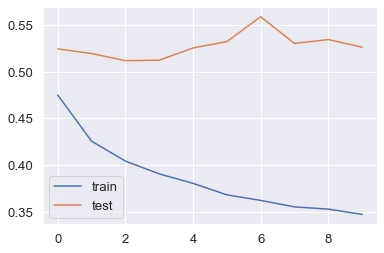

In [229]:
# evaluate the model
_, train_acc = model.evaluate(X_train_padded, UKROWtrain_df.label, verbose=1)
_, test_acc = model.evaluate(X_test_padded,  UStest_df.label, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

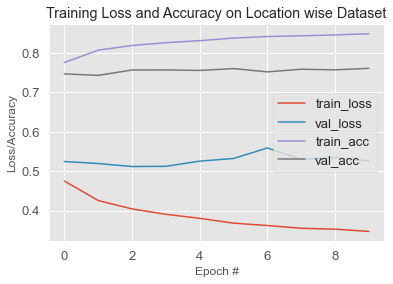

In [230]:
# plot the training loss and accuracy
N = 10
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Location wise Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")
plt.savefig("ModelAccuracy(USTest-BiLSTM-Att)")

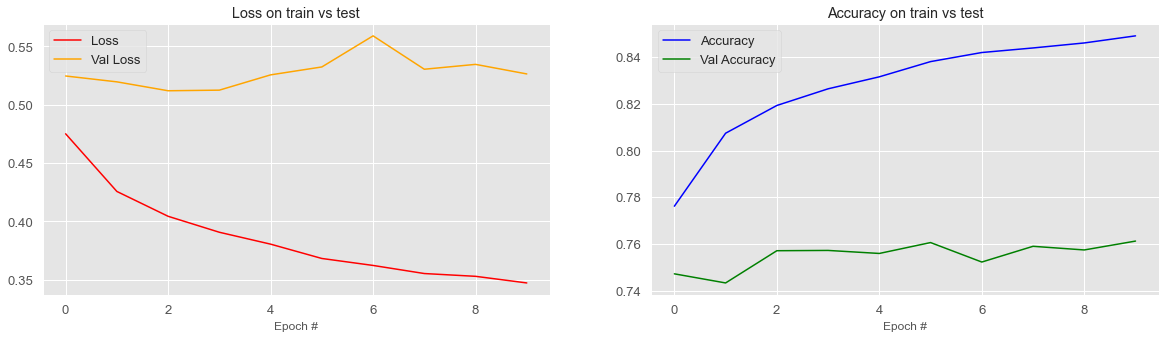

In [231]:
plt.figure(figsize=(20,5))

# plot loss & val loss
plt.subplot(1,2,1)
sns.lineplot(x=history.epoch, y=history.history['loss'], color='red', label='Loss')
sns.lineplot(x=history.epoch, y=history.history['val_loss'], color='orange', label='Val Loss')
plt.title('Loss on train vs test')
plt.xlabel("Epoch #")
plt.legend(loc='best')
plt.savefig("Model Loss(USTest-BiLSTM-Att)")
# plot accuracy and val accuracy
plt.subplot(1,2,2)
sns.lineplot(x=history.epoch, y=history.history['accuracy'], color='blue', label='Accuracy')
sns.lineplot(x=history.epoch, y=history.history['val_accuracy'], color='green', label='Val Accuracy')
plt.title('Accuracy on train vs test')
plt.xlabel("Epoch #")
plt.legend(loc='best')
plt.savefig("Model Accuracy (USTest-BiLSTM-Att)")
plt.show()

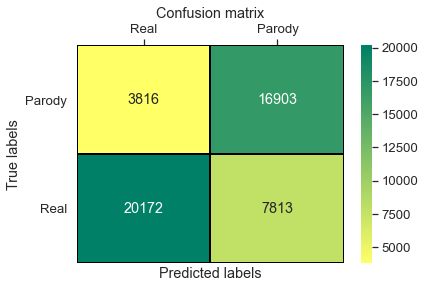

Classification report on test data
              precision    recall  f1-score   support

         0.0       0.84      0.72      0.78     27985
         1.0       0.68      0.82      0.74     20719

    accuracy                           0.76     48704
   macro avg       0.76      0.77      0.76     48704
weighted avg       0.77      0.76      0.76     48704



In [232]:
y_test_hat = model.predict(X_test_padded, batch_size=64)
y_test_hat = np.round(y_test_hat)

conf_m = confusion_matrix(y_test_hat,UStest_df.label)
clas_r = classification_report(y_test_hat,UStest_df.label)

# plot confusion matrix as heatmap

sns.set(font_scale=1.2)
ax = sns.heatmap(conf_m, annot=True,xticklabels=['Real', 'Parody'], yticklabels=['Real', 'Parody'], 
                 cbar=True, cmap='summer_r',linewidths=1, linecolor='black', fmt='.0f')
plt.yticks(rotation=0)
ax.set_ylim([0,2])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
ax.xaxis.set_ticks_position('top') 
plt.title('Confusion matrix')
plt.show()

# print classification report
print('Classification report on test data')
print(clas_r)